### Imports

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import TreebankWordTokenizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from matplotlib import pyplot as plt
%matplotlib inline

from common_word_counts import find_common_words
from tokenization_lemmatization import tokenize_lemmatize
import nmf_viz_utility as vu

pd.options.mode.chained_assignment = None

### Bring in pickled files

In [2]:
popular_rr = pd.read_pickle('popular_rr.pkl')

In [3]:
stopwords_list = pd.read_pickle('stopwords_list.pkl')

### Topic Modeling

#### Reviews

##### Vectorizer

In [4]:
cv_rev_steps_ingr = CountVectorizer(stop_words=stopwords_list, min_df=.01)

rev_steps_ingr_cv = cv_rev_steps_ingr.fit_transform(popular_rr['rev_steps_ingr'])
rev_steps_ingr_cv_dtm = pd.DataFrame(rev_steps_ingr_cv.toarray(), columns=cv_rev_steps_ingr.get_feature_names())
rev_steps_ingr_cv_dtm.index = popular_rr['rev_steps_ingr'].index

rev_steps_ingr_cv_dtm

/home/dlsagan/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,ability,absolute,absolutley,absolutly,absorb,abt,abundance,accent,accept,acceptable,...,zillion,zing,zingy,zip,ziploc,ziplock,zipper,zippy,ziti,zucchini
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,42
2159,0,0,0,0,0,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,41
2160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,49
2161,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,38


In [5]:
find_common_words(rev_steps_ingr_cv_dtm.transpose())

{'sugar': 0.332871012482663,
 'wonderful': 0.3153028201571891,
 'sauce': 0.30235783633841884,
 'garlic': 0.29958391123439665,
 'turn': 0.29542302357836336,
 'butter': 0.29357374017568194,
 'perfect': 0.289875173370319,
 'onion': 0.26999537679149327,
 'pepper': 0.26999537679149327,
 'cheese': 0.26490984743411927,
 'dish': 0.2528895053166898,
 'bit': 0.25057790106333794,
 'minute': 0.24965325936199723,
 'eat': 0.24826629680998613,
 'share': 0.24503005085529359,
 'top': 0.23994452149791956,
 'chicken': 0.23300970873786409,
 'cream': 0.2288488210818308,
 'half': 0.22052704576976423,
 'salt': 0.2048081368469718,
 'flour': 0.2020342117429496,
 'oil': 0.17753120665742025,
 'sweet': 0.17660656495607951,
 'oven': 0.17198335644937587,
 'milk': 0.16920943134535368,
 'fresh': 0.1659731853906611,
 'water': 0.14979195561719832,
 'cut': 0.14655570966250578,
 'mix': 0.14655570966250578,
 'work': 0.1382339343504392,
 'tomato': 0.13453536754507628,
 'bread': 0.13314840499306518,
 'meat': 0.1326860841423

In [6]:
tfidf_rev_steps_ingr = TfidfVectorizer(stop_words=stopwords_list, ngram_range=(1,2), min_df=.01)

rev_steps_ingr_tfidf = tfidf_rev_steps_ingr.fit_transform(popular_rr['rev_steps_ingr'])
rev_steps_ingr_tfidf_dtm = pd.DataFrame(rev_steps_ingr_tfidf.toarray(), columns=tfidf_rev_steps_ingr.get_feature_names())
rev_steps_ingr_tfidf_dtm.index = popular_rr['rev_steps_ingr'].index

rev_steps_ingr_tfidf_dtm

/home/dlsagan/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,ability,absolute,absolute favorite,absolute hit,absolute keeper,absolute perfection,absolutley,absolutly,absolutly wonderful,absorb,...,zipper,zippy,ziti,zucchini,zucchini garden,zucchini mushroom,zucchini onion,zucchini slice,zucchini squash,zucchini yellow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.011073,0.0,0.0,0.008211,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.604699,0.027437,0.0,0.000000,0.000000,0.000000,0.000000
2159,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.337591,0.015691,0.0,0.015578,0.000000,0.095584,0.110659
2160,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.514354,0.060011,0.0,0.000000,0.000000,0.000000,0.000000
2161,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.629207,0.031554,0.0,0.000000,0.030899,0.000000,0.000000


In [7]:
find_common_words(rev_steps_ingr_tfidf_dtm.transpose())

{'sauce': 0.2473416551086454,
 'sugar': 0.23439667128987518,
 'cheese': 0.2061950993989829,
 'chicken': 0.19741100323624594,
 'garlic': 0.17290799815071659,
 'butter': 0.17290799815071659,
 'onion': 0.1650485436893204,
 'flour': 0.16458622283865001,
 'cream': 0.16134997688395747,
 'pepper': 0.14609338881183542,
 'dish': 0.1382339343504392,
 'milk': 0.13499768839574663,
 'tomato': 0.12528895053166897,
 'dough': 0.11650485436893204,
 'chocolate': 0.11604253351826167,
 'bread': 0.11419325011558021,
 'soup': 0.10078594544613963,
 'meat': 0.10078594544613963,
 'oil': 0.09939898289412853,
 'rice': 0.09893666204345816,
 'beef': 0.09662505779010633,
 'vanilla': 0.09616273693943597,
 'broth': 0.09431345353675451,
 'potato': 0.09107720758206195,
 'cinnamon': 0.0892279241793805,
 'egg': 0.08460471567267684,
 'cake': 0.08090614886731391,
 'chip': 0.07905686546463246,
 'lemon': 0.07304669440591771,
 'roll': 0.06934812760055478,
 'sour cream': 0.0651872399445215,
 'breast': 0.0651872399445215,
 'wat

##### NMF

In [12]:
nmf_rev_steps_ingr = NMF(n_components=20)
rev_steps_ingr_topics_nmf = nmf_rev_steps_ingr.fit_transform(rev_steps_ingr_tfidf_dtm)

In [13]:
feature_names = tfidf_rev_steps_ingr.get_feature_names() # already done above
rsi_nmf_weights = nmf_rev_steps_ingr.components_

In [14]:
rsi_nmf_topics = vu.get_topics_terms_weights(rsi_nmf_weights, feature_names)
vu.print_topics_udf(rsi_nmf_topics, total_topics=20, num_terms=10, display_weights=True)

Topic #1 with weights
[('sauce', 3.26), ('rib', 0.78), ('meatball', 0.62), ('bbq sauce', 0.5), ('bbq', 0.47), ('beef', 0.38), ('meat', 0.36), ('wing', 0.32), ('spaghetti', 0.31), ('soy sauce', 0.29)]
Topic #2 with weights
[('chocolate', 1.71), ('chip', 1.06), ('cookie', 0.99), ('chocolate chip', 0.89), ('peanut', 0.68), ('peanut butter', 0.67), ('butter', 0.53), ('brownie', 0.51), ('sugar', 0.34), ('chewy', 0.33)]
Topic #3 with weights
[('bread', 1.82), ('loaf', 0.92), ('flour', 0.34), ('rise', 0.33), ('yeast', 0.29), ('dough', 0.25), ('wheat', 0.2), ('toast', 0.2), ('sandwich', 0.2), ('bread bread', 0.19)]
Topic #4 with weights
[('chicken', 2.31), ('breast', 0.64), ('chicken breast', 0.43), ('marinade', 0.25), ('thigh', 0.22), ('boneless', 0.2), ('marinate', 0.19), ('sauce', 0.19), ('skinless', 0.19), ('skin', 0.19)]
Topic #5 with weights
[('cake', 2.3), ('frosting', 0.37), ('cake mix', 0.36), ('frost', 0.33), ('cupcake', 0.31), ('chocolate', 0.29), ('chocolate cake', 0.21), ('vanilla

In [15]:
rsi_topics_display_list = vu.get_topics_udf(rsi_nmf_topics, total_topics=20, num_terms=10)

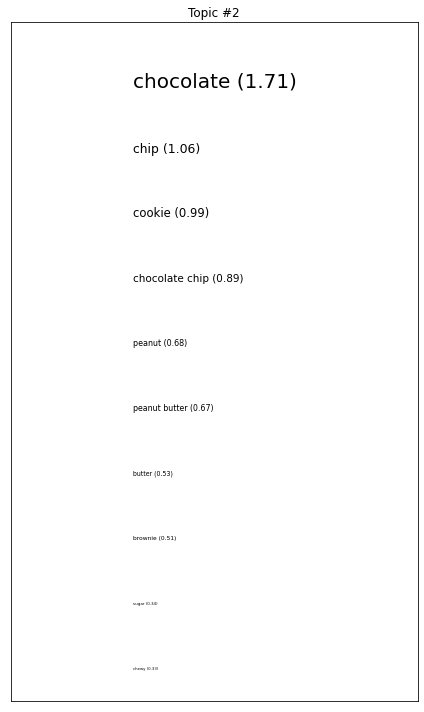

In [72]:
topic_num = 1
terms, sizes = vu.getTermsAndSizes(rsi_topics_display_list[topic_num])

num_top_words = 10
fontsize_base = 20 / np.max(sizes)

num_topics = 1

for t in range(num_topics):
    
    fig, ax = plt.subplots(1, num_topics, figsize=(6, 10))
    plt.ylim(-.5, num_top_words)
    plt.xticks([])
    plt.yticks([])
    plt.title('Topic #{}'.format(topic_num + 1))

    for i, (word, share) in enumerate(zip(terms, sizes)):
        word = word + " (" + str(share) + ")"
        plt.text(0.3, num_top_words-i-1.0, word, fontsize=fontsize_base*share)

plt.tight_layout()
# plt.savefig('rsi_topic_15.png')

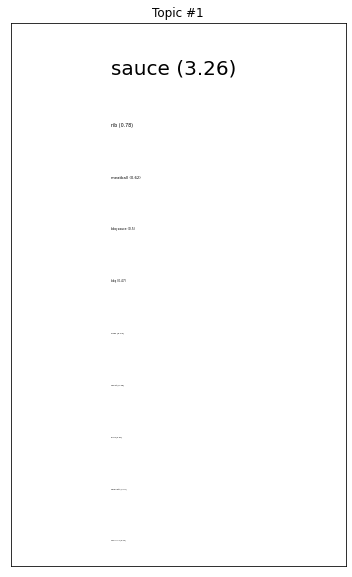

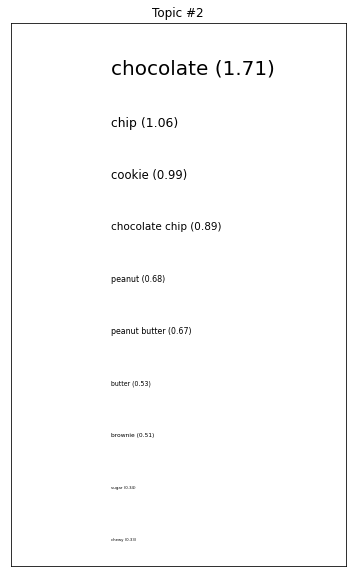

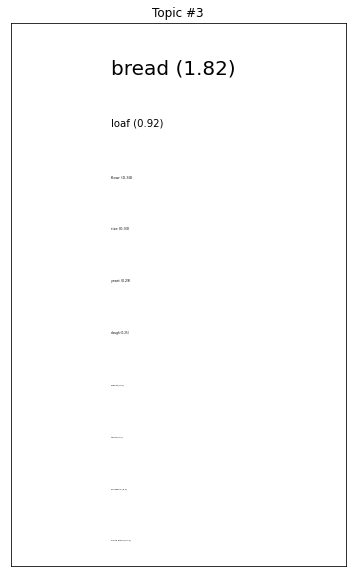

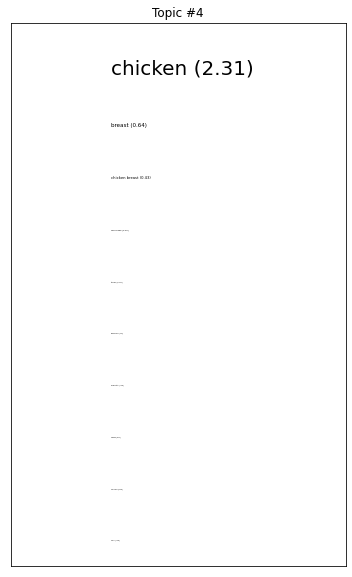

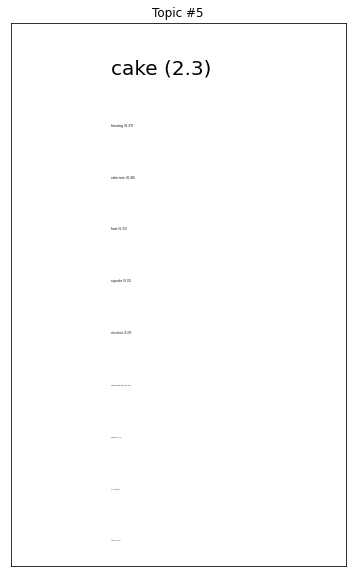

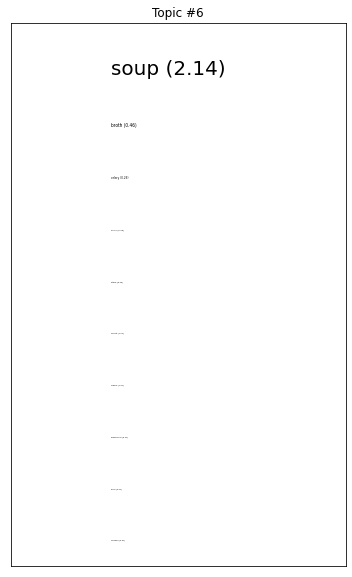

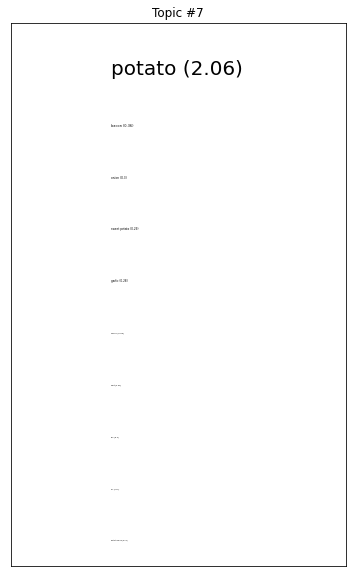

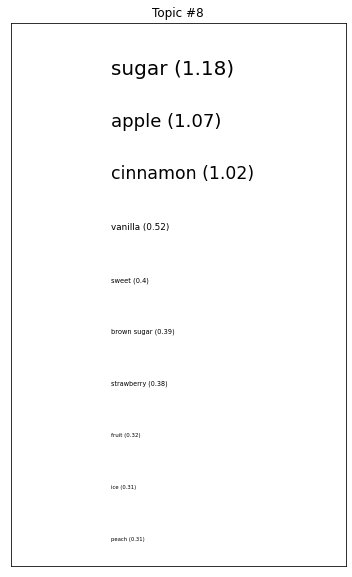

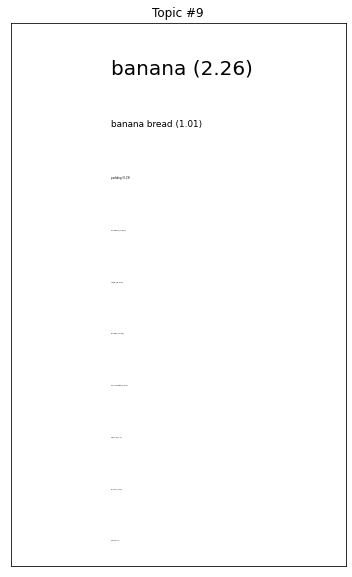

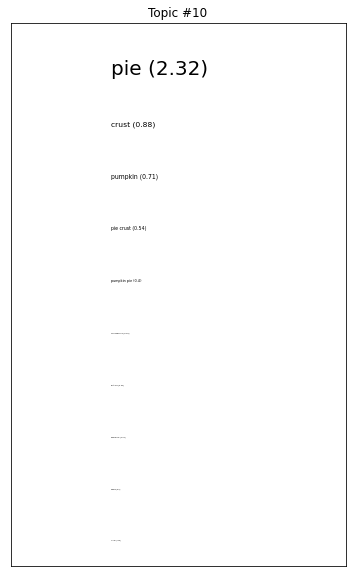

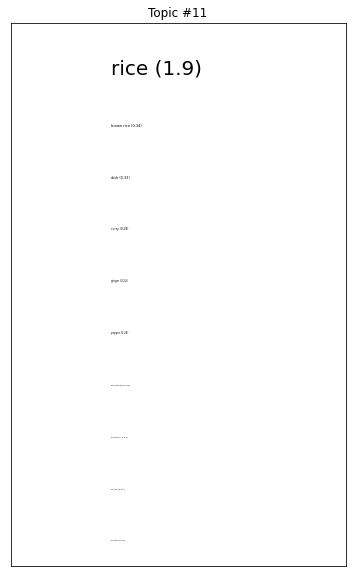

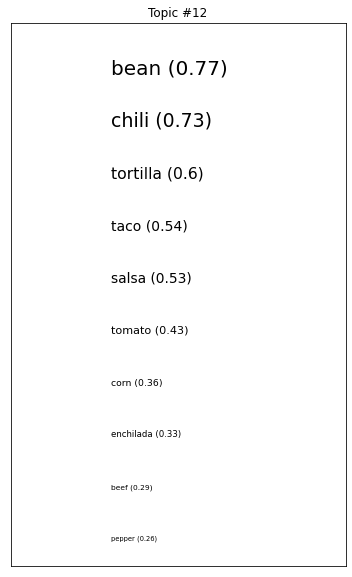

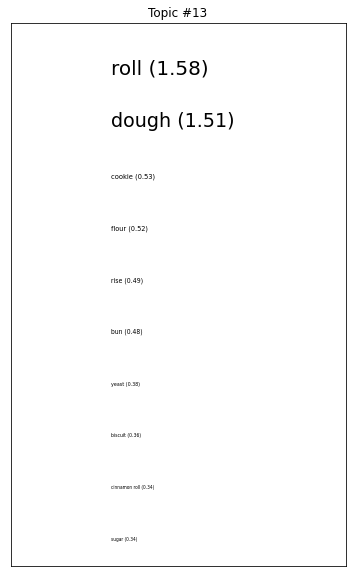

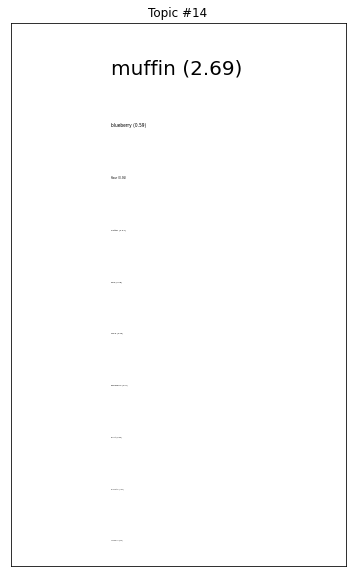

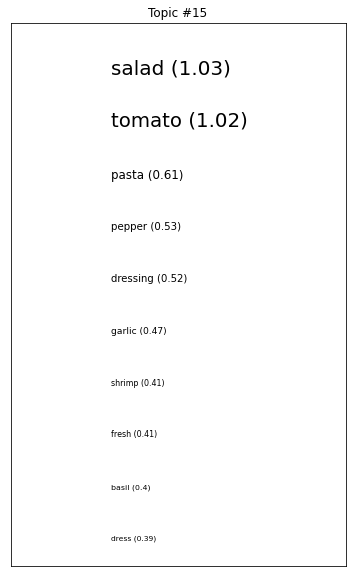

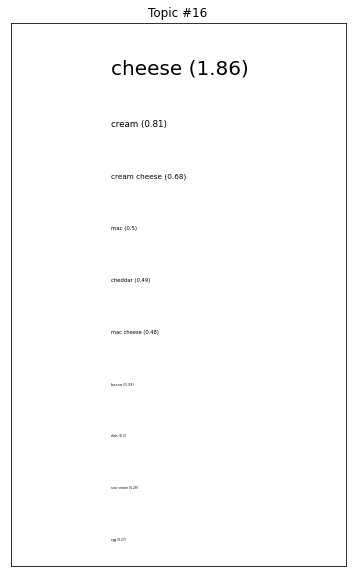

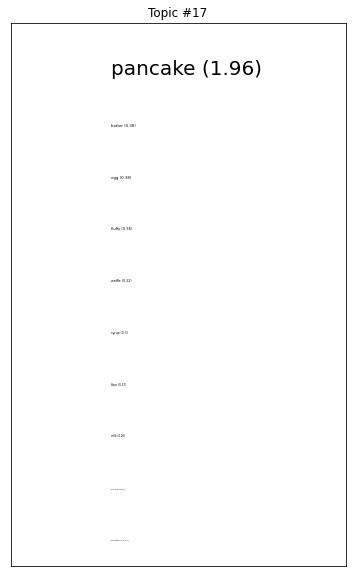

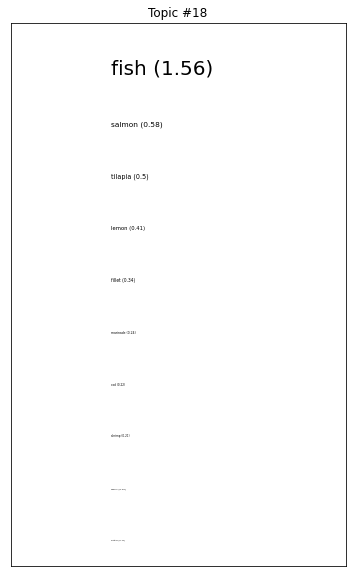

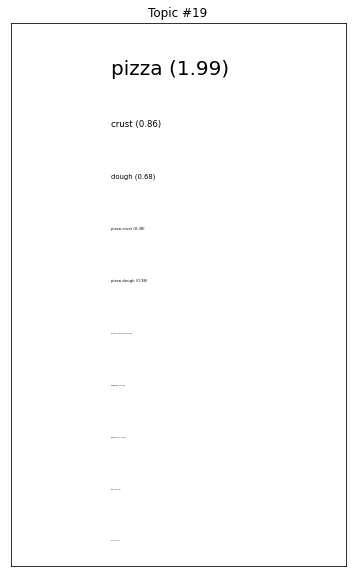

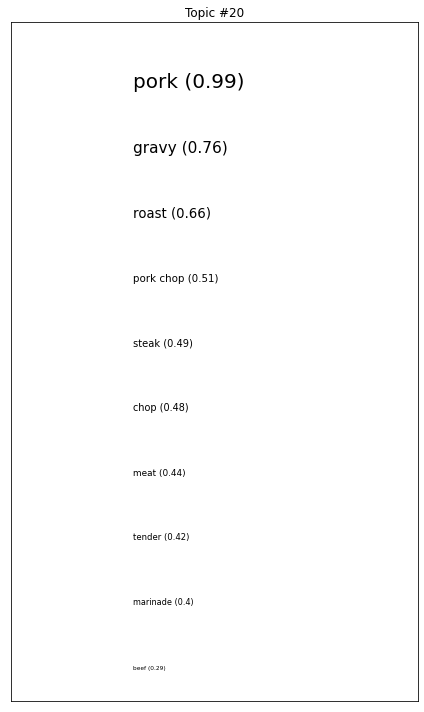

In [17]:
for index, item in enumerate(rsi_topics_display_list):

    topic_num = index
    terms, sizes = vu.getTermsAndSizes(rsi_topics_display_list[topic_num])

    num_top_words = 10
    fontsize_base = 20 / np.max(sizes)


    
    fig, ax = plt.subplots(1, 0, figsize=(6, 10))
    plt.ylim(-.5, num_top_words)
    plt.xticks([])
    plt.yticks([])
    plt.title('Topic #{}'.format(topic_num + 1))

    for i, (word, share) in enumerate(zip(terms, sizes)):
        word = word + " (" + str(share) + ")"
        plt.text(0.3, num_top_words-i-1.0, word, fontsize=fontsize_base*share)

plt.tight_layout()
# plt.savefig('prj4_mvp.png')

In [18]:
topic_word_nmf_rev_steps_ingr = pd.DataFrame(nmf_rev_steps_ingr.components_.round(4),
             columns = tfidf_rev_steps_ingr.get_feature_names())
topic_word_nmf_rev_steps_ingr

,ability,absolute,absolute favorite,absolute hit,absolute keeper,absolute perfection,absolutley,absolutly,absolutly wonderful,absorb,...,zipper,zippy,ziti,zucchini,zucchini garden,zucchini mushroom,zucchini onion,zucchini slice,zucchini squash,zucchini yellow
0,0.0007,0.0090,0.0031,0.0006,0.0000,0.0014,0.0009,0.0029,0.0000,0.0000,...,0.0000,0.0016,0.0418,0.0000,0.0000,0.0033,0.0000,0.0020,0.0000,0.0000
1,0.0009,0.0147,0.0082,0.0026,0.0017,0.0021,0.0011,0.0021,0.0000,0.0000,...,0.0005,0.0000,0.0000,0.0305,0.0028,0.0000,0.0000,0.0004,0.0000,0.0000
2,0.0006,0.0049,0.0013,0.0000,0.0005,0.0005,0.0011,0.0020,0.0000,0.0005,...,0.0000,0.0001,0.0003,0.0709,0.0066,0.0000,0.0000,0.0013,0.0013,0.0012
3,0.0007,0.0024,0.0000,0.0006,0.0006,0.0004,0.0017,0.0029,0.0015,0.0029,...,0.0022,0.0000,0.0000,0.0000,0.0000,0.0009,0.0008,0.0000,0.0000,0.0000
4,0.0006,0.0035,0.0002,0.0014,0.0000,0.0009,0.0004,0.0012,0.0003,0.0057,...,0.0000,0.0000,0.0000,0.0095,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0007,0.0047,0.0022,0.0005,0.0000,0.0001,0.0010,0.0004,0.0000,0.0023,...,0.0000,0.0001,0.0000,0.0092,0.0000,0.0007,0.0000,0.0002,0.0012,0.0000
6,0.0029,0.0018,0.0000,0.0000,0.0000,0.0005,0.0015,0.0028,0.0000,0.0039,...,0.0055,0.0000,0.0000,0.0002,0.0000,0.0001,0.0000,0.0004,0.0000,0.0000
7,0.0000,0.0043,0.0030,0.0006,0.0000,0.0013,0.0023,0.0004,0.0012,0.0087,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000
8,0.0000,0.0052,0.0027,0.0000,0.0009,0.0000,0.0000,0.0001,0.0007,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0013,0.0055,0.0029,0.0010,0.0007,0.0027,0.0010,0.0019,0.0001,0.0000,...,0.0000,0.0014,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [19]:
topic_word_nmf_rev_steps_ingr.transpose().sort_values(by=9, ascending=False).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
pie,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.3219,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
crust,0.0000,0.0000,0.1319,0.0038,0.0000,0.0000,0.0000,0.0000,0.0000,0.8833,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0273,0.8605,0.0021
pumpkin,0.0000,0.0000,0.0390,0.0000,0.0681,0.0063,0.0000,0.0000,0.0000,0.7133,0.0,0.0000,0.0000,0.1705,0.0000,0.0081,0.0746,0.0000,0.0000,0.0000
pie crust,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5371,0.0,0.0000,0.0132,0.0000,0.0000,0.0000,0.0000,0.0000,0.0161,0.0000
pumpkin pie,0.0000,0.0000,0.0036,0.0000,0.0284,0.0000,0.0000,0.0000,0.0000,0.3963,0.0,0.0000,0.0000,0.0526,0.0000,0.0000,0.0103,0.0000,0.0000,0.0000
cheesecake,0.0000,0.0278,0.0000,0.0000,0.0794,0.0000,0.0000,0.0000,0.0696,0.2318,0.0,0.0000,0.0000,0.0000,0.0000,0.1143,0.0000,0.0000,0.0000,0.0000
pot pie,0.0000,0.0000,0.0000,0.0396,0.0000,0.0232,0.0122,0.0000,0.0000,0.2247,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0020,0.0000
apple pie,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1783,0.0000,0.2149,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
apple,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0681,0.0000,0.2043,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0267
filling,0.0022,0.0000,0.0000,0.0000,0.0167,0.0110,0.0000,0.0503,0.0000,0.1859,0.0,0.0593,0.1140,0.0132,0.0189,0.0979,0.0005,0.0000,0.0000,0.0000


In [20]:
rev_steps_ingr_topic_scores = pd.DataFrame(rev_steps_ingr_topics_nmf.round(4),
             index = popular_rr['rev_steps_ingr'].index,
             columns = ['heavy_sauce', 'cookies_brownies', 'healthy_bread', 'chicken', 'cake_cupcake', \
                        'soup_broth', 'potato', 'dessert_fruit', 'banana_bread', 'pies_cheesecake', \
                        'rice_asian', 'hispanic', 'sweet_bread', 'muffins', 'salad', 'dairy', \
                        'pancake_waffle', 'seafood', 'pizza_italian', 'red_meat'])
rev_steps_ingr_topic_scores

,heavy_sauce,cookies_brownies,healthy_bread,chicken,cake_cupcake,soup_broth,potato,dessert_fruit,banana_bread,pies_cheesecake,rice_asian,hispanic,sweet_bread,muffins,salad,dairy,pancake_waffle,seafood,pizza_italian,red_meat
0,0.0000,0.0009,0.0108,0.0083,0.0000,0.0656,0.0062,0.0000,0.0000,0.0000,0.0069,0.0000,0.0000,0.0000,0.0356,0.0903,0.0000,0.0029,0.0000,0.0166
1,0.0001,0.0000,0.0208,0.0001,0.0084,0.0000,0.0000,0.1011,0.0209,0.0000,0.0010,0.0000,0.1271,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0012
2,0.0000,0.0041,0.0000,0.0000,0.0956,0.0046,0.0000,0.0787,0.0484,0.0463,0.0000,0.0000,0.0000,0.0000,0.0000,0.0285,0.0000,0.0000,0.0000,0.0000
3,0.0816,0.0000,0.0002,0.0000,0.0000,0.0196,0.0221,0.0000,0.0014,0.0003,0.0000,0.0109,0.0000,0.0043,0.0543,0.0247,0.0042,0.0000,0.0014,0.0420
4,0.0122,0.0000,0.0014,0.0232,0.0000,0.0000,0.0000,0.0016,0.0007,0.0005,0.0000,0.0004,0.0000,0.0000,0.0012,0.0000,0.0000,0.0545,0.0003,0.1354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,0.0000,0.0000,0.0078,0.0048,0.0042,0.0000,0.0000,0.0000,0.0000,0.0015,0.0000,0.0000,0.0000,0.0015,0.1506,0.0000,0.0034,0.0467,0.0000,0.0049
2159,0.0000,0.0000,0.0865,0.0084,0.0000,0.0036,0.0048,0.0000,0.0000,0.0000,0.0055,0.0274,0.0000,0.0000,0.1146,0.0236,0.0000,0.0000,0.0000,0.0000
2160,0.0027,0.0000,0.0042,0.0001,0.0000,0.0000,0.0095,0.0000,0.0000,0.0000,0.0000,0.0057,0.0000,0.0000,0.0393,0.0011,0.2982,0.0000,0.0000,0.0000
2161,0.0056,0.0055,0.0106,0.0094,0.0000,0.0000,0.0146,0.0000,0.0000,0.0000,0.0227,0.0000,0.0000,0.0010,0.1054,0.0266,0.0072,0.0142,0.0035,0.0003


#### Tags

##### Vectorizer

In [21]:
cv_tags = CountVectorizer(stop_words=stopwords_list)

tags_cv = cv_tags.fit_transform(popular_rr['tags'])
tags_cv_dtm = pd.DataFrame(tags_cv.toarray(), columns=cv_tags.get_feature_names())
tags_cv_dtm.index = popular_rr['tags'].index

tags_cv_dtm

/home/dlsagan/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,african,ahead,american,amish,appetizer,apple,appliance,argentine,ashkenazi,asian,...,wild,wing,winter,wrap,yam,year,yeast,yellow,zealand,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
find_common_words(tags_cv_dtm.transpose())

{'main': 0.7438742487286176,
 'dietary': 0.6458622283865002,
 'equipment': 0.5917706888580675,
 'occasion': 0.5233472029588534,
 'low': 0.435506241331484,
 'dish': 0.3869625520110957,
 'meat': 0.32038834951456313,
 'north': 0.29403606102635227,
 'mood': 0.2861766065649561,
 'oven': 0.2769301895515488,
 'american': 0.26999537679149327,
 'cuisine': 0.26675913083680075,
 'food': 0.2538141470180305,
 'healthy': 0.22838650023116042,
 'event': 0.21220527045769763,
 'holiday': 0.19509939898289413,
 'comfort': 0.19093851132686085,
 'carb': 0.18631530282015718,
 'protein': 0.178455848358761,
 'vegetable': 0.17706888580674987,
 'friendly': 0.17521960240406842,
 'cholesterol': 0.17475728155339806,
 'calorie': 0.1701340730466944,
 'egg': 0.16920943134535368,
 'fat': 0.15857605177993528,
 'beginner': 0.14609338881183542,
 'grain': 0.14331946370781323,
 'party': 0.14008321775312066,
 'sodium': 0.14008321775312066,
 'top': 0.13915857605177995,
 'poultry': 0.1368469717984281,
 'dairy': 0.1266759130836

In [23]:
tfidf_tags = TfidfVectorizer(stop_words=stopwords_list, ngram_range=(1,2))

tags_tfidf = tfidf_tags.fit_transform(popular_rr['tags'])
tags_tfidf_dtm = pd.DataFrame(tags_tfidf.toarray(), columns=tfidf_tags.get_feature_names())
tags_tfidf_dtm.index = popular_rr['tags'].index

tags_tfidf_dtm

/home/dlsagan/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,african,african american,african asian,african australian,african barbecue,african beginner,african bread,african diabetic,african dietary,african dinner,...,yeast mood,yeast novelty,yeast pasta,yeast toddler,yellow,yellow bean,zealand,zealand high,zucchini,zucchini scratch
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### NMF

In [24]:
nmf_tags = NMF(n_components=3)
tags_topics_nmf = nmf_tags.fit_transform(tags_tfidf_dtm)

In [25]:
tags_nmf_feature_names = tfidf_tags.get_feature_names()
tags_nmf_weights = nmf_tags.components_

In [26]:
tags_topics = vu.get_topics_terms_weights(tags_nmf_weights, tags_nmf_feature_names)
vu.print_topics_udf(tags_topics, total_topics=3, num_terms=10, display_weights=True)

Topic #1 with weights
[('low', 2.58), ('fat', 0.79), ('healthy', 0.64), ('dietary low', 0.55), ('low cholesterol', 0.5), ('cholesterol', 0.5), ('calorie', 0.48), ('low calorie', 0.48), ('low saturate', 0.48), ('saturate', 0.48)]
Topic #2 with weights
[('main', 0.69), ('dish', 0.63), ('chicken', 0.63), ('meat', 0.62), ('main dish', 0.59), ('beef', 0.56), ('high', 0.44), ('poultry', 0.43), ('low meat', 0.36), ('pork', 0.31)]
Topic #3 with weights
[('american', 0.68), ('food', 0.44), ('occasion', 0.44), ('friendly', 0.43), ('mood', 0.38), ('kid friendly', 0.38), ('kid', 0.38), ('event', 0.38), ('holiday', 0.38), ('holiday event', 0.38)]


In [27]:
tags_topics_display_list = vu.get_topics_udf(tags_topics, total_topics=3, num_terms=10)

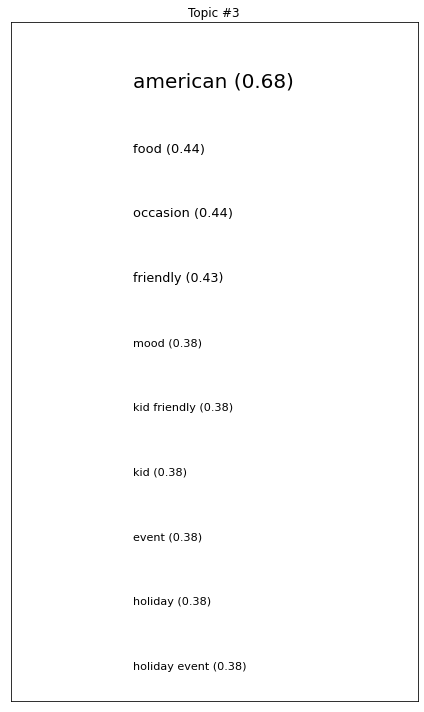

In [47]:
topic_num = 2
terms, sizes = vu.getTermsAndSizes(tags_topics_display_list[topic_num])

num_top_words = 10
fontsize_base = 20 / np.max(sizes)

num_topics = 1

for t in range(num_topics):
    
    fig, ax = plt.subplots(1, num_topics, figsize=(6, 10))
    plt.ylim(-.5, num_top_words)
    plt.xticks([])
    plt.yticks([])
    plt.title('Topic #{}'.format(topic_num + 1))

    for i, (word, share) in enumerate(zip(terms, sizes)):
        word = word + " (" + str(share) + ")"
        plt.text(0.3, num_top_words-i-1.0, word, fontsize=fontsize_base*share)

plt.tight_layout()
plt.savefig('tags_topic_3.png')

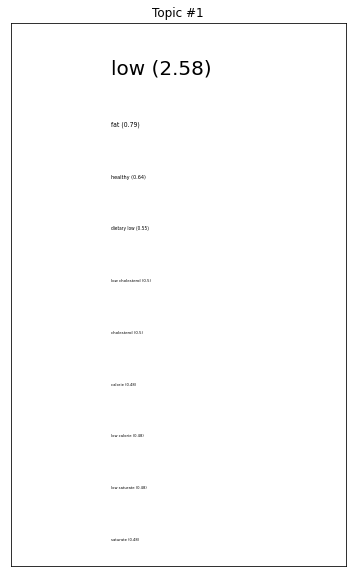

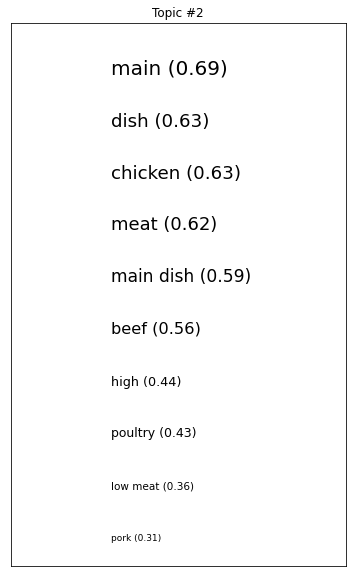

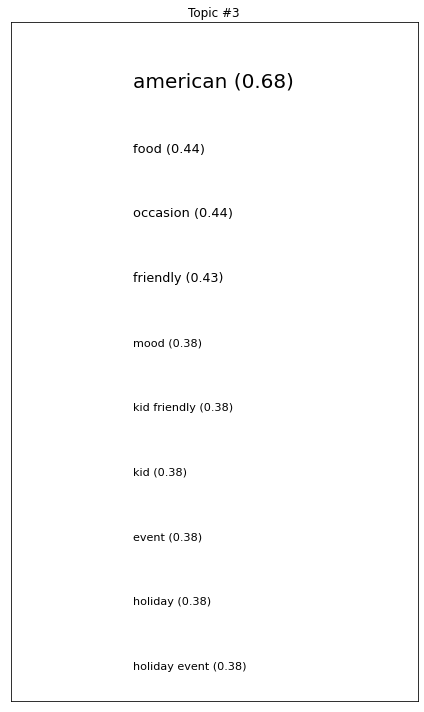

In [29]:
for index, item in enumerate(tags_topics_display_list):

    topic_num = index
    terms, sizes = vu.getTermsAndSizes(tags_topics_display_list[topic_num])

    num_top_words = 10
    fontsize_base = 20 / np.max(sizes)


    
    fig, ax = plt.subplots(1, 0, figsize=(6, 10))
    plt.ylim(-.5, num_top_words)
    plt.xticks([])
    plt.yticks([])
    plt.title('Topic #{}'.format(topic_num + 1))

    for i, (word, share) in enumerate(zip(terms, sizes)):
        word = word + " (" + str(share) + ")"
        plt.text(0.3, num_top_words-i-1.0, word, fontsize=fontsize_base*share)

plt.tight_layout()


In [30]:
tags_topic_scores = pd.DataFrame(tags_topics_nmf.round(4),
             index = popular_rr['tags'].index,
             columns = ['healthy_eating', 'main_dish', 'american_kid_friendly'])
tags_topic_scores

,healthy_eating,main_dish,american_kid_friendly
0,0.0763,0.0669,0.0453
1,0.0000,0.0109,0.0363
2,0.0009,0.0058,0.0342
3,0.0092,0.0128,0.0103
4,0.0565,0.1236,0.0000
...,...,...,...
2158,0.1637,0.0000,0.0172
2159,0.1830,0.0093,0.0000
2160,0.0011,0.0419,0.0481
2161,0.1262,0.0189,0.0581


### Bringing it all together

In [31]:
full_recipe_topic_scores = pd.concat([popular_rr, tags_topic_scores, rev_steps_ingr_topic_scores], axis=1).drop(['tags', 'rev_steps_ingr'], axis=1)

In [32]:
full_recipe_topic_scores.to_pickle('full_recipe_topic_scores.pkl')

### Returning for testing recipes for Recommender

In [33]:
test_rr = pd.read_pickle('test_rr.pkl')

In [34]:
test_rsi_tfidf = tfidf_rev_steps_ingr.transform(test_rr['rev_steps_ingr'])
test_rsi_tfidf_dtm = pd.DataFrame(test_rsi_tfidf.toarray(), columns=tfidf_rev_steps_ingr.get_feature_names())
test_rsi_tfidf_dtm.index = test_rr['rev_steps_ingr'].index

test_rsi_tfidf_dtm

,ability,absolute,absolute favorite,absolute hit,absolute keeper,absolute perfection,absolutley,absolutly,absolutly wonderful,absorb,...,zipper,zippy,ziti,zucchini,zucchini garden,zucchini mushroom,zucchini onion,zucchini slice,zucchini squash,zucchini yellow
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.013541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018254,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
test_rsi_topics_nmf = nmf_rev_steps_ingr.transform(test_rsi_tfidf_dtm)

In [36]:
topic_word_nmf_test_rsi = pd.DataFrame(nmf_rev_steps_ingr.components_.round(4),
             columns = tfidf_rev_steps_ingr.get_feature_names())
topic_word_nmf_test_rsi

,ability,absolute,absolute favorite,absolute hit,absolute keeper,absolute perfection,absolutley,absolutly,absolutly wonderful,absorb,...,zipper,zippy,ziti,zucchini,zucchini garden,zucchini mushroom,zucchini onion,zucchini slice,zucchini squash,zucchini yellow
0,0.0007,0.0090,0.0031,0.0006,0.0000,0.0014,0.0009,0.0029,0.0000,0.0000,...,0.0000,0.0016,0.0418,0.0000,0.0000,0.0033,0.0000,0.0020,0.0000,0.0000
1,0.0009,0.0147,0.0082,0.0026,0.0017,0.0021,0.0011,0.0021,0.0000,0.0000,...,0.0005,0.0000,0.0000,0.0305,0.0028,0.0000,0.0000,0.0004,0.0000,0.0000
2,0.0006,0.0049,0.0013,0.0000,0.0005,0.0005,0.0011,0.0020,0.0000,0.0005,...,0.0000,0.0001,0.0003,0.0709,0.0066,0.0000,0.0000,0.0013,0.0013,0.0012
3,0.0007,0.0024,0.0000,0.0006,0.0006,0.0004,0.0017,0.0029,0.0015,0.0029,...,0.0022,0.0000,0.0000,0.0000,0.0000,0.0009,0.0008,0.0000,0.0000,0.0000
4,0.0006,0.0035,0.0002,0.0014,0.0000,0.0009,0.0004,0.0012,0.0003,0.0057,...,0.0000,0.0000,0.0000,0.0095,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0007,0.0047,0.0022,0.0005,0.0000,0.0001,0.0010,0.0004,0.0000,0.0023,...,0.0000,0.0001,0.0000,0.0092,0.0000,0.0007,0.0000,0.0002,0.0012,0.0000
6,0.0029,0.0018,0.0000,0.0000,0.0000,0.0005,0.0015,0.0028,0.0000,0.0039,...,0.0055,0.0000,0.0000,0.0002,0.0000,0.0001,0.0000,0.0004,0.0000,0.0000
7,0.0000,0.0043,0.0030,0.0006,0.0000,0.0013,0.0023,0.0004,0.0012,0.0087,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000
8,0.0000,0.0052,0.0027,0.0000,0.0009,0.0000,0.0000,0.0001,0.0007,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0013,0.0055,0.0029,0.0010,0.0007,0.0027,0.0010,0.0019,0.0001,0.0000,...,0.0000,0.0014,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [37]:
test_rsi_topic_scores = pd.DataFrame(test_rsi_topics_nmf.round(4),
             index = test_rr['rev_steps_ingr'].index,
             columns = ['heavy_sauce', 'cookies_brownies', 'healthy_bread', 'chicken', 'cake_cupcake', \
                        'soup_broth', 'potato', 'dessert_fruit', 'banana_bread', 'pies_cheesecake', \
                        'rice_asian', 'hispanic', 'sweet_bread', 'muffins', 'salad', 'dairy', \
                        'pancake_waffle', 'seafood', 'pizza_italian', 'red_meat'])
test_rsi_topic_scores

,heavy_sauce,cookies_brownies,healthy_bread,chicken,cake_cupcake,soup_broth,potato,dessert_fruit,banana_bread,pies_cheesecake,rice_asian,hispanic,sweet_bread,muffins,salad,dairy,pancake_waffle,seafood,pizza_italian,red_meat
0,0.0189,0.0026,0.0151,0.0093,0.0000,0.0000,0.0054,0.0071,0.0000,0.0002,0.0431,0.0000,0.0000,0.0000,0.1058,0.0167,0.0000,0.0490,0.0025,0.0000
1,0.0000,0.0881,0.0008,0.0020,0.0166,0.0001,0.0014,0.0249,0.0000,0.0019,0.0000,0.0000,0.0900,0.0057,0.0000,0.0069,0.0157,0.0086,0.0033,0.0014
2,0.0000,0.0033,0.0000,0.0000,0.0054,0.0000,0.0000,0.0020,0.0062,0.0013,0.0000,0.2181,0.0000,0.0000,0.0000,0.0482,0.0000,0.0000,0.0000,0.0000
3,0.0104,0.0000,0.0000,0.0000,0.0320,0.0000,0.0190,0.0015,0.0000,0.0015,0.0000,0.0048,0.0109,0.0009,0.0006,0.0538,0.0000,0.0000,0.0000,0.0008
4,0.0000,0.0114,0.0019,0.0034,0.0000,0.0000,0.0103,0.0114,0.0000,0.0000,0.0062,0.0170,0.0013,0.0000,0.0103,0.0263,0.0000,0.0157,0.0030,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0032,0.0044,0.0008,0.0000,0.0074,0.0010,0.0000,0.0332,0.0000,0.0063,0.0045,0.0042,0.0000,0.0045,0.0105,0.0050,0.0000,0.0049,0.0000,0.0009
329,0.0682,0.0000,0.0000,0.1105,0.0000,0.0000,0.0000,0.0081,0.0000,0.0000,0.0598,0.0047,0.0000,0.0000,0.0000,0.0000,0.0000,0.0054,0.0000,0.0101
330,0.0000,0.0008,0.0033,0.0197,0.0000,0.0000,0.0013,0.0000,0.0000,0.0000,0.0007,0.1528,0.0012,0.0000,0.0000,0.0686,0.0099,0.0041,0.0053,0.0000
331,0.0000,0.0000,0.0000,0.0000,0.0022,0.0000,0.0101,0.0013,0.0002,0.0000,0.0000,0.0000,0.0000,0.0006,0.1564,0.0324,0.0024,0.0000,0.0000,0.0000


In [38]:
test_tags_tfidf = tfidf_tags.transform(test_rr['tags'])
test_tags_tfidf_dtm = pd.DataFrame(test_tags_tfidf.toarray(), columns=tfidf_tags.get_feature_names())
test_tags_tfidf_dtm.index = test_rr['tags'].index

test_tags_tfidf_dtm

,african,african american,african asian,african australian,african barbecue,african beginner,african bread,african diabetic,african dietary,african dinner,...,yeast mood,yeast novelty,yeast pasta,yeast toddler,yellow,yellow bean,zealand,zealand high,zucchini,zucchini scratch
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
test_tags_topics_nmf = nmf_tags.transform(test_tags_tfidf_dtm)

In [40]:
test_tags_topic_scores = pd.DataFrame(test_tags_topics_nmf.round(4),
             index = test_rr['tags'].index,
             columns = ['healthy_eating', 'main_dish', 'american_kid_friendly'])
test_tags_topic_scores

,healthy_eating,main_dish,american_kid_friendly
0,0.0000,0.0881,0.0515
1,0.0000,0.0000,0.1163
2,0.0023,0.0000,0.1334
3,0.0106,0.0000,0.0070
4,0.0373,0.0487,0.0274
...,...,...,...
328,0.0043,0.0000,0.0179
329,0.0274,0.0963,0.0210
330,0.0007,0.0458,0.0987
331,0.0000,0.0879,0.0210


In [41]:
test_recipe_topic_scores = pd.concat([test_rr, test_tags_topic_scores, test_rsi_topic_scores], axis=1).drop(['tags', 'rev_steps_ingr'], axis=1)

In [42]:
test_recipe_topic_scores.to_pickle('test_recipe_topic_scores.pkl')

In [43]:
test_recipe_topic_scores

,name,id,minutes,n_steps,n_ingredients,calories,healthy_eating,main_dish,american_kid_friendly,heavy_sauce,...,rice_asian,hispanic,sweet_bread,muffins,salad,dairy,pancake_waffle,seafood,pizza_italian,red_meat
0,minute shrimp scampi,31184,15,9,8,596.2,0.0000,0.0881,0.0515,0.0189,...,0.0431,0.0000,0.0000,0.0000,0.1058,0.0167,0.0000,0.0490,0.0025,0.0000
1,ingredient melt in your mouth shortbread cookies,200419,25,9,3,84.8,0.0000,0.0000,0.1163,0.0000,...,0.0000,0.0000,0.0900,0.0057,0.0000,0.0069,0.0157,0.0086,0.0033,0.0014
2,layer fiesta party dip,27893,20,14,10,345.2,0.0023,0.0000,0.1334,0.0000,...,0.0000,0.2181,0.0000,0.0000,0.0000,0.0482,0.0000,0.0000,0.0000,0.0000
3,ab bacon burger bites on white polenta cakes a,517863,80,28,13,137.4,0.0106,0.0000,0.0070,0.0104,...,0.0000,0.0048,0.0109,0.0009,0.0006,0.0538,0.0000,0.0000,0.0000,0.0008
4,adult popcorn,11427,8,6,7,156.9,0.0373,0.0487,0.0274,0.0000,...,0.0062,0.0170,0.0013,0.0000,0.0103,0.0263,0.0000,0.0157,0.0030,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,ya ya punch,59148,5,2,6,702.3,0.0043,0.0000,0.0179,0.0032,...,0.0045,0.0042,0.0000,0.0045,0.0105,0.0050,0.0000,0.0049,0.0000,0.0009
329,yakitori,74844,45,6,7,182.1,0.0274,0.0963,0.0210,0.0682,...,0.0598,0.0047,0.0000,0.0000,0.0000,0.0000,0.0000,0.0054,0.0000,0.0101
330,your basic quesadilla,139060,10,8,5,372.2,0.0007,0.0458,0.0987,0.0000,...,0.0007,0.1528,0.0012,0.0000,0.0000,0.0686,0.0099,0.0041,0.0053,0.0000
331,yummy layer salad,51349,15,5,12,292.1,0.0000,0.0879,0.0210,0.0000,...,0.0000,0.0000,0.0000,0.0006,0.1564,0.0324,0.0024,0.0000,0.0000,0.0000
